In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [38]:
covid_df = pd.concat([covid_CA, covid_FL], ignore_index=True, axis=0)
covid_df

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2020-01-23,CA,2020-01-16,2020-01-22,0,0,0,0,0,0
1,2020-01-30,CA,2020-01-23,2020-01-29,2,2,0,0,0,0
2,2020-02-06,CA,2020-01-30,2020-02-05,8,6,0,0,0,0
3,2020-02-13,CA,2020-02-06,2020-02-12,16,8,0,0,0,0
4,2020-02-20,CA,2020-02-13,2020-02-19,30,14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
307,2022-12-15,FL,2022-12-08,2022-12-14,7290073,19960,83379,187,0,0
308,2022-12-22,FL,2022-12-15,2022-12-21,7312663,22590,83597,218,0,0
309,2022-12-29,FL,2022-12-22,2022-12-28,7338503,25840,83903,306,0,0
310,2023-01-05,FL,2022-12-29,2023-01-04,7361744,23241,84014,111,0,0


In [39]:
covid_df.loc[:,'start_date'] = pd.to_datetime(covid_df['start_date'], format='%Y-%m-%d')
covid_df.loc[:,'end_date'] = pd.to_datetime(covid_df['end_date'], format='%Y-%m-%d')

/var/folders/jg/lg7y7jcx4ln9mznd77xlyd7h0000gn/T/ipykernel_29491/3795353143.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  covid_df.loc[:,'start_date'] = pd.to_datetime(covid_df['start_date'], format='%Y-%m-%d')
/var/folders/jg/lg7y7jcx4ln9mznd77xlyd7h0000gn/T/ipykernel_29491/3795353143.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  covid_df.loc[:,'end_date'] = pd.to_datetime(covid_df['end_date'], format='%Y-%m-%d')


In [53]:
weekly_truck_df.rename(index=str, columns={'date': 'start_date'}, inplace=True)
weekly_truck_df.replace('California', 'CA',inplace=True)
weekly_truck_df.replace('Florida', 'FL',inplace=True)
#weekly_truck_df.Region.unique()

array(['CA', 'FL'], dtype=object)

In [41]:
fruit_df.rename(index=str, columns={'date': 'start_date'}, inplace=True)
fruit_df.Commodity.unique()
fruit_df.replace('Avocados 4/', 'Avocados',inplace=True)
fruit_df.replace('Cantaloupes', 'Cantaloupe',inplace=True)
fruit_df.replace('Honeydew', 'Honeydews',inplace=True)
fruit_df.replace('Melons, mixed', 'Mixed and Misc Melons',inplace=True)
fruit_df.replace('Watermelon', 'Watermelons',inplace=True)
fruit_df.replace('Watermelon, seeded', 'Watermelons, Seeded',inplace=True)
fruit_df.replace('Watermelon, seedless', 'Watermelons, Seedless',inplace=True)


In [52]:
fruit_df

,Commodity,start_date,price
0,Apples,2022-04-23,1.437777
1,Avocados,2022-04-23,1.580000
2,Bananas,2022-04-23,0.520000
3,Blueberries,2022-04-23,3.020000
4,Cantaloupe,2022-04-23,0.810000
...,...,...,...
2283,Raspberries,2020-05-02,2.270000
2284,Strawberries,2020-05-02,2.540000
2285,Watermelons,2020-05-02,NaN
2286,"Watermelons, Seeded",2020-05-02,0.270000


In [54]:
#comm_df = weekly_truck_df.merge(fruit_df, how='inner', on='Commodity')
df1 = covid_df.merge(weekly_truck_df, how='cross')
df1 = df1.query("start_date_y >= start_date_x & start_date_y <= end_date & Region == state")
df2 = covid_df.merge(fruit_df, how='cross')
df2 = df2.query("start_date_y >= start_date_x & start_date_y <= end_date")

In [58]:
truck = df1.loc[:,['start_date_x','new_cases','Commodity','10,000 LBS']]
price = df2.loc[:,['start_date_x','Commodity','price']]
df = pd.merge(truck,price)

/var/folders/jg/lg7y7jcx4ln9mznd77xlyd7h0000gn/T/ipykernel_29491/905072245.py:30: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



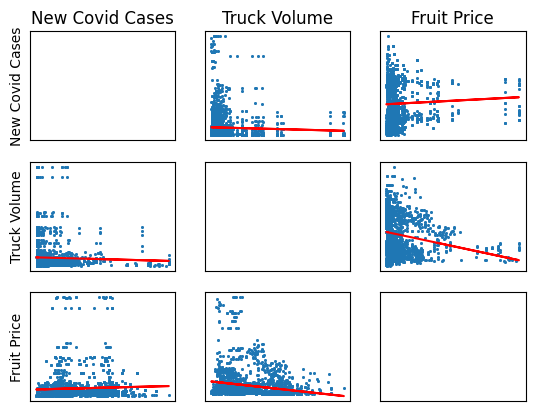

In [96]:
fig, axs = plt.subplots(3, 3)

variables = ['new_cases','10,000 LBS','price']

for i in range(3):
    for j in range(3):
        if j != i:
            sub = df.loc[:,[variables[i],variables[j]]]
            sub.dropna(inplace=True)
            x = sub.loc[:,variables[i]]
            y = sub.loc[:,variables[j]]
            axs[i,j].scatter(x, y, s=1)
            m, b = np.polyfit(x, y, 1)
            axs[i,j].plot(x, m*x+b, color='red')
            
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

names = ['New Covid Cases','Truck Volume','Fruit Price']

cols = names
rows = names

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row)

fig.show()